In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler

In [24]:
df = pd.read_csv('Madedata1.csv')

In [25]:
df.shape

(2499, 12)

In [26]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [27]:
df.drop(columns=['Country'] ,inplace=True)

In [28]:
df.shape

(2499, 11)

In [29]:
gender = df['Gender'].values
severity = df['Severity'].values
contact = df['Contact_with_covid_patient'].values

In [30]:
df.drop(columns=['Gender', 'Severity', 'Contact_with_covid_patient'],inplace=True)

In [31]:
gender_label = LabelEncoder()
gender = gender_label.fit_transform(gender)
gender_onehot = OneHotEncoder()
gender_onehot.fit_transform(gender.reshape(-1,1)).toarray()
gender = gender_onehot.fit_transform(gender.reshape(-1,1)).toarray()

severity_label = LabelEncoder()
severity = severity_label.fit_transform(severity)

severity_onehot = OneHotEncoder()
severity = severity_onehot.fit_transform(severity.reshape(-1,1)).toarray()


contact_label = LabelEncoder()
contact = contact_label.fit_transform(contact)

contact_onehot = OneHotEncoder()
contact = contact_onehot.fit_transform(contact.reshape(-1,1)).toarray()

In [32]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [33]:
x = np.c_[x,gender,severity,contact]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [39]:
x_train.shape

(1874, 17)

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,17)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [57]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.fit(x_train, y_train,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
59/59 [==============================] - 2s 15ms/step - loss: 1.0653 - accuracy: 0.5982 - val_loss: 0.4186 - val_accuracy: 0.8960
Epoch 2/5
59/59 [==============================] - 0s 6ms/step - loss: 0.3681 - accuracy: 0.8805 - val_loss: 0.3114 - val_accuracy: 0.9296
Epoch 3/5
59/59 [==============================] - 0s 6ms/step - loss: 0.2767 - accuracy: 0.9109 - val_loss: 0.2754 - val_accuracy: 0.9024
Epoch 4/5
59/59 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.9050 - val_loss: 0.2727 - val_accuracy: 0.9024
Epoch 5/5
59/59 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.9029 - val_loss: 0.2456 - val_accuracy: 0.9184


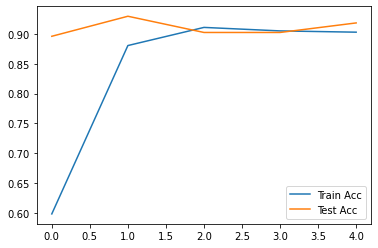

In [59]:
plt.plot(model.history.history['accuracy'], label='Train Acc')
plt.plot(model.history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.show()

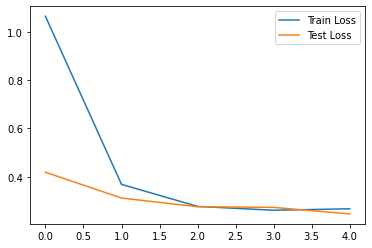

In [60]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()